In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x=df.drop(columns=["Outcome"])
y=df["Outcome"]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(20,activation='relu',input_dim=8)) #input layer
#rectified linear unit 
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 20)                180       
                                                                 
 dense_10 (Dense)            (None, 15)                315       
                                                                 
 dense_11 (Dense)            (None, 1)                 16        
                                                                 
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])


    Regression Loss Functions
        Mean Squared Error Loss
        Mean Squared Logarithmic Error Loss
        Mean Absolute Error Loss
    Binary Classification Loss Functions
        Binary Cross-Entropy
        Hinge Loss
        Squared Hinge Loss
    Multi-Class Classification Loss Functions
        Multi-Class Cross-Entropy Loss
        Sparse Multiclass Cross-Entropy Loss
        Kullback Leibler Divergence Loss


In [ ]:
history=model.fit(xtrain,ytrain,epochs=50,batch_size=5)

Epoch 1/50
123/123 [==============================] - 1s 1ms/step - loss: 4.8367 - accuracy: 0.6254
Epoch 2/50
123/123 [==============================] - 0s 1ms/step - loss: 1.1753 - accuracy: 0.5798
Epoch 3/50
123/123 [==============================] - 0s 1ms/step - loss: 0.9007 - accuracy: 0.5961
Epoch 4/50
123/123 [==============================] - 0s 1ms/step - loss: 0.8063 - accuracy: 0.6173
Epoch 5/50
123/123 [==============================] - 0s 1ms/step - loss: 0.7856 - accuracy: 0.6450
Epoch 6/50
123/123 [==============================] - 0s 1ms/step - loss: 0.7615 - accuracy: 0.6450
Epoch 7/50
123/123 [==============================] - 0s 1ms/step - loss: 0.7502 - accuracy: 0.6661
Epoch 8/50
123/123 [==============================] - 0s 1ms/step - loss: 0.6591 - accuracy: 0.6857
Epoch 9/50
123/123 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.6694
Epoch 10/50
123/123 [==============================] - 0s 1ms/step - loss: 0.6659 - accuracy: 0.6612

In [ ]:
history

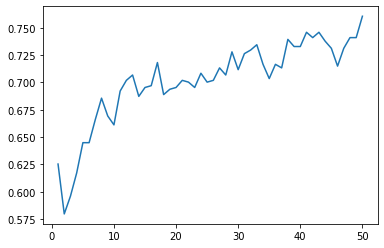

In [ ]:
plt.plot(range(1,51),history.history['accuracy'])

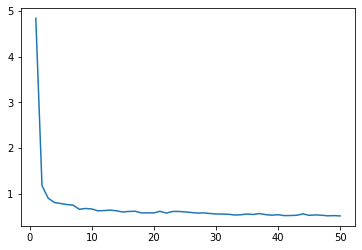

In [ ]:
plt.plot(range(1,51),history.history['loss'])

In [ ]:
_,acc=model.evaluate(xtrain,ytrain)
acc

20/20 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.7687


0.7687296271324158

In [ ]:
_,acc=model.evaluate(xtest,ytest)
acc

5/5 [==============================] - 0s 3ms/step - loss: 0.5463 - accuracy: 0.7597


0.7597402334213257

In [ ]:
ypred=model.predict(xtest)
ypred=np.round(ypred).astype('int')


Accuracy is : 0.7597402597402597
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       107
           1       0.61      0.60      0.60        47

    accuracy                           0.76       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.76      0.76      0.76       154



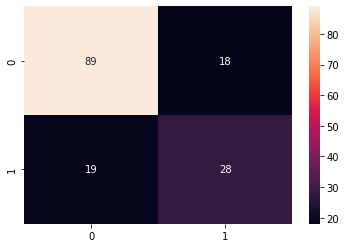

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))